In [18]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as requests
from config import weather_api_key
import time
today=time.time()
from datetime import datetime
from scipy.stats import linregress
url = 'https://api.openweathermap.org/data/2.5/weather?appid=' + weather_api_key

In [19]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
coordinates = list(lat_lngs)

In [21]:
from citipy import citipy

In [32]:
cities_data = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities_data:
        cities_data.append(city)
#Print the city count to confirm sufficient count
cities_data

['killorglin',
 'bluff',
 'cherskiy',
 'port alfred',
 'barrow',
 'ucluelet',
 'busselton',
 'punta arenas',
 'geraldton',
 'albany',
 'quatre cocos',
 'krasnoselkup',
 'puerto ayora',
 'hasaki',
 'vaini',
 'kayes',
 'coruripe',
 'bengkulu',
 'mahebourg',
 'cape town',
 'rikitea',
 'tuktoyaktuk',
 'nanortalik',
 'eyl',
 'georgetown',
 'sitka',
 'constitucion',
 'avarua',
 'castro',
 'jiujiang',
 'hilo',
 'atuona',
 'port lincoln',
 'cheremukhovo',
 'ushuaia',
 'veydelevka',
 'macae',
 'sotouboua',
 'faanui',
 'nileshwar',
 'bethel',
 'khatanga',
 'mys shmidta',
 'sumbawa',
 'ambunti',
 'lompoc',
 'taoudenni',
 'cocorit',
 'ayan',
 'sao filipe',
 'noumea',
 'tiksi',
 'amderma',
 'qaanaaq',
 'jamestown',
 'taolanaro',
 'mataura',
 'luau',
 'cairns',
 'hithadhoo',
 'umzimvubu',
 'tasiilaq',
 'provideniya',
 'arraial do cabo',
 'san pedro de macoris',
 'kyzyl-suu',
 'boras',
 'fortuna',
 'utiroa',
 'talnakh',
 'rocha',
 'san patricio',
 'thoen',
 'morant bay',
 'upernavik',
 'illoqqortoorm

In [56]:
# print the beginning of the logging
print("Beginning data retrieval       ")
print("-------------------------------")

# create counters
record_count = 1
set_count = 1
city_data_test = cities_data
city_data = []
# Loop through all the cities in the list.
print(city_data_test)
for i, city in enumerate(city_data_test):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_weather_stats= {"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}
        city_data.append(city_weather_stats)

# If an error is experienced, skip the city.
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval       
-------------------------------
['killorglin', 'bluff', 'cherskiy', 'port alfred', 'barrow', 'ucluelet', 'busselton', 'punta arenas', 'geraldton', 'albany', 'quatre cocos', 'krasnoselkup', 'puerto ayora', 'hasaki', 'vaini', 'kayes', 'coruripe', 'bengkulu', 'mahebourg', 'cape town', 'rikitea', 'tuktoyaktuk', 'nanortalik', 'eyl', 'georgetown', 'sitka', 'constitucion', 'avarua', 'castro', 'jiujiang', 'hilo', 'atuona', 'port lincoln', 'cheremukhovo', 'ushuaia', 'veydelevka', 'macae', 'sotouboua', 'faanui', 'nileshwar', 'bethel', 'khatanga', 'mys shmidta', 'sumbawa', 'ambunti', 'lompoc', 'taoudenni', 'cocorit', 'ayan', 'sao filipe', 'noumea', 'tiksi', 'amderma', 'qaanaaq', 'jamestown', 'taolanaro', 'mataura', 'luau', 'cairns', 'hithadhoo', 'umzimvubu', 'tasiilaq', 'provideniya', 'arraial do cabo', 'san pedro de macoris', 'kyzyl-suu', 'boras', 'fortuna', 'utiroa', 'talnakh', 'rocha', 'san patricio', 'thoen', 'morant bay', 'upernavik', 'illoqqortoormiut', 'kush

{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.36, 'feels_like': 289.2, 'temp_min': 289.36, 'temp_max': 289.36, 'pressure': 1027, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 59, 'gust': 8.99}, 'clouds': {'all': 100}, 'dt': 1650134152, 'sys': {'type': 2, 'id': 2072861, 'country': 'ZA', 'sunrise': 1650083706, 'sunset': 1650124141}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
Processing Record 5 of Set 1 | barrow
{'coord': {'lon': -156.7887, 'lat': 71.2906}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 256.16, 'feels_like': 249.16, 'temp_min': 256.16, 'temp_max': 256.16, 'pressure': 1030, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1650134153, 'sys': {'type': 1, 'id': 7649, 'coun

{'coord': {'lon': 102.2655, 'lat': -3.8004}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.25, 'feels_like': 299.19, 'temp_min': 298.25, 'temp_max': 298.25, 'pressure': 1007, 'humidity': 91, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 1.95, 'deg': 47, 'gust': 2.13}, 'clouds': {'all': 100}, 'dt': 1650134158, 'sys': {'country': 'ID', 'sunrise': 1650150587, 'sunset': 1650193859}, 'timezone': 25200, 'id': 1649150, 'name': 'Bengkulu', 'cod': 200}
Processing Record 19 of Set 1 | mahebourg
{'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.31, 'feels_like': 299.31, 'temp_min': 298.29, 'temp_max': 299.31, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1650134158, 'sys': {'type':

{'coord': {'lon': -139.0333, 'lat': -9.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.37, 'feels_like': 299.37, 'temp_min': 299.37, 'temp_max': 299.37, 'pressure': 1014, 'humidity': 77, 'sea_level': 1014, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 8.13, 'deg': 82, 'gust': 8.61}, 'rain': {'1h': 0.26}, 'clouds': {'all': 50}, 'dt': 1650134163, 'sys': {'country': 'PF', 'sunrise': 1650122363, 'sunset': 1650165116}, 'timezone': -34200, 'id': 4020109, 'name': 'Atuona', 'cod': 200}
Processing Record 33 of Set 1 | port lincoln
{'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.84, 'feels_like': 291.91, 'temp_min': 291.84, 'temp_max': 291.84, 'pressure': 1010, 'humidity': 82, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.47, 'deg': 278

{'coord': {'lon': -109.9667, 'lat': 27.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.34, 'feels_like': 299.94, 'temp_min': 301.34, 'temp_max': 301.34, 'pressure': 1013, 'humidity': 4, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.65, 'deg': 220, 'gust': 1.96}, 'clouds': {'all': 100}, 'dt': 1650134169, 'sys': {'type': 1, 'id': 7104, 'country': 'MX', 'sunrise': 1650113639, 'sunset': 1650159890}, 'timezone': -25200, 'id': 4013593, 'name': 'Cocorit', 'cod': 200}
Processing Record 49 of Set 1 | ayan
{'coord': {'lon': 138.1667, 'lat': 56.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 265.7, 'feels_like': 259.48, 'temp_min': 265.7, 'temp_max': 265.7, 'pressure': 1016, 'humidity': 82, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.27, 'deg': 347, '

{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 298.07, 'feels_like': 298.31, 'temp_min': 297.13, 'temp_max': 298.07, 'pressure': 1016, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1650134235, 'sys': {'type': 1, 'id': 8326, 'country': 'BR', 'sunrise': 1650099685, 'sunset': 1650141238}, 'timezone': -10800, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}
Processing Record 15 of Set 2 | san pedro de macoris
{'coord': {'lon': -69.2972, 'lat': 18.4616}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.22, 'feels_like': 302.48, 'temp_min': 301.22, 'temp_max': 303.49, 'pressure': 1013, 'humidity': 58, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.82, 'deg': 145, 'gust': 7.71}, 'clouds

Processing Record 30 of Set 2 | ribeira grande
{'coord': {'lon': -28.7, 'lat': 38.5167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 290.37, 'feels_like': 290.03, 'temp_min': 290.37, 'temp_max': 290.37, 'pressure': 1024, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1650134241, 'sys': {'type': 1, 'id': 6883, 'country': 'PT', 'sunrise': 1650093439, 'sunset': 1650141088}, 'timezone': 0, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}
Processing Record 31 of Set 2 | flinders
{'coord': {'lon': 150.8552, 'lat': -34.5833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 287.16, 'feels_like': 286.99, 'temp_min': 287.07, 'temp_max': 287.75, 'pressure': 1014, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 282, 'gust': 2.68}, 'clouds': {'all': 1}, 'dt':

{'coord': {'lon': 16.1194, 'lat': 69.3143}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 279.14, 'feels_like': 275.04, 'temp_min': 279.14, 'temp_max': 279.14, 'pressure': 1025, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 240}, 'clouds': {'all': 100}, 'dt': 1650134246, 'sys': {'type': 1, 'id': 1603, 'country': 'NO', 'sunrise': 1650077503, 'sunset': 1650135514}, 'timezone': 7200, 'id': 3163146, 'name': 'Andenes', 'cod': 200}
Processing Record 46 of Set 2 | komsomolskiy
{'coord': {'lon': 71.7189, 'lat': 40.4272}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.55, 'feels_like': 290.62, 'temp_min': 291.55, 'temp_max': 291.55, 'pressure': 1011, 'humidity': 45}, 'visibility': 9000, 'wind': {'speed': 4.12, 'deg': 150}, 'clouds': {'all': 5}, 'dt': 1650134246, 'sys': {'type': 1, 'id': 9014, 'country': 'UZ', '

{'coord': {'lon': 76.6625, 'lat': 61.9449}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.81, 'feels_like': 266.36, 'temp_min': 271.81, 'temp_max': 271.81, 'pressure': 1006, 'humidity': 90, 'sea_level': 1006, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 5.33, 'deg': 295, 'gust': 8.84}, 'clouds': {'all': 95}, 'dt': 1650134311, 'sys': {'country': 'RU', 'sunrise': 1650065270, 'sunset': 1650118691}, 'timezone': 18000, 'id': 1497210, 'name': 'Novoagansk', 'cod': 200}
Processing Record 11 of Set 3 | kapaa
{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.56, 'feels_like': 297.15, 'temp_min': 296.33, 'temp_max': 298.14, 'pressure': 1019, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1650134304, 'sys': {'type': 2

{'coord': {'lon': 91.6419, 'lat': 48.0056}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 278.12, 'feels_like': 276.85, 'temp_min': 278.12, 'temp_max': 278.12, 'pressure': 1024, 'humidity': 15, 'sea_level': 1024, 'grnd_level': 865}, 'visibility': 10000, 'wind': {'speed': 1.67, 'deg': 242, 'gust': 1.67}, 'clouds': {'all': 0}, 'dt': 1650134316, 'sys': {'country': 'MN', 'sunrise': 1650150048, 'sunset': 1650199497}, 'timezone': 25200, 'id': 1516048, 'name': 'Khovd', 'cod': 200}
Processing Record 25 of Set 3 | toropets
{'coord': {'lon': 31.6353, 'lat': 56.4978}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 272.37, 'feels_like': 268.57, 'temp_min': 272.37, 'temp_max': 272.37, 'pressure': 1026, 'humidity': 90, 'sea_level': 1026, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 3.16, 'deg': 9, 'gust': 10.68}, 'clouds': {'a

{'coord': {'lon': 70.1307, 'lat': 28.3062}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 306.46, 'feels_like': 304.15, 'temp_min': 306.46, 'temp_max': 306.46, 'pressure': 1000, 'humidity': 4, 'sea_level': 1000, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 2.66, 'deg': 83, 'gust': 2.73}, 'clouds': {'all': 40}, 'dt': 1650134322, 'sys': {'country': 'PK', 'sunrise': 1650070404, 'sunset': 1650116692}, 'timezone': 18000, 'id': 1166652, 'name': 'Saddiqabad', 'cod': 200}
Processing Record 39 of Set 3 | padang
{'coord': {'lon': 100.3543, 'lat': -0.9492}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.18, 'feels_like': 299.18, 'temp_min': 299.18, 'temp_max': 299.18, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 1.42, 'deg': 71, 'gust': 1.09}, 'rain':

{'coord': {'lon': 134.2556, 'lat': 7.0419}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 296.43, 'feels_like': 296.72, 'temp_min': 296.43, 'temp_max': 296.43, 'pressure': 1008, 'humidity': 73, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.82, 'deg': 283, 'gust': 0.85}, 'clouds': {'all': 26}, 'dt': 1650134387, 'sys': {'type': 1, 'id': 7901, 'country': 'PW', 'sunrise': 1650142433, 'sunset': 1650186660}, 'timezone': 32400, 'id': 7671223, 'name': 'Kloulklubed', 'cod': 200}
Processing Record 4 of Set 4 | vaitupu
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 5 of Set 4 | ponta do sol
{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.77, 'feels_like': 293.11, 'temp_min': 293.77, 'temp_max': 295.5, '

{'coord': {'lon': 97.9683, 'lat': 4.4683}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.26, 'feels_like': 298.23, 'temp_min': 297.26, 'temp_max': 297.26, 'pressure': 1007, 'humidity': 96, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.19, 'deg': 281, 'gust': 1.58}, 'clouds': {'all': 98}, 'dt': 1650134393, 'sys': {'country': 'ID', 'sunrise': 1650151254, 'sunset': 1650195254}, 'timezone': 25200, 'id': 1214724, 'name': 'Langsa', 'cod': 200}
Processing Record 20 of Set 4 | san pedro
{'coord': {'lon': 121.0167, 'lat': 14.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 302.52, 'temp_min': 299.96, 'temp_max': 300.72, 'pressure': 1009, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1650134394, 'sys': {'type': 2,

{'coord': {'lon': 42.4509, 'lat': 18.3851}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.44, 'feels_like': 291.6, 'temp_min': 292.44, 'temp_max': 293.21, 'pressure': 1014, 'humidity': 45, 'sea_level': 1014, 'grnd_level': 789}, 'visibility': 10000, 'wind': {'speed': 1.51, 'deg': 20, 'gust': 2.03}, 'clouds': {'all': 4}, 'dt': 1650134398, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1650077565, 'sunset': 1650122815}, 'timezone': 10800, 'id': 110690, 'name': 'Faya', 'cod': 200}
Processing Record 35 of Set 4 | vakhtan
{'coord': {'lon': 46.6889, 'lat': 57.9659}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.28, 'feels_like': 269.21, 'temp_min': 271.28, 'temp_max': 271.28, 'pressure': 1023, 'humidity': 86, 'sea_level': 1023, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 1.53, 'deg': 67, 'gust': 4.6

{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 246.54, 'feels_like': 246.54, 'temp_min': 246.54, 'temp_max': 246.54, 'pressure': 1023, 'humidity': 100, 'sea_level': 1023, 'grnd_level': 1019}, 'visibility': 5449, 'wind': {'speed': 1.22, 'deg': 180, 'gust': 1.24}, 'clouds': {'all': 100}, 'dt': 1650134406, 'sys': {'country': 'RU', 'sunrise': 1650131460, 'sunset': 1650191077}, 'timezone': 39600, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
Processing Record 50 of Set 4 | sangar
{'coord': {'lon': 127.4739, 'lat': 63.9242}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 253.87, 'feels_like': 253.87, 'temp_min': 253.87, 'temp_max': 253.87, 'pressure': 1019, 'humidity': 99, 'sea_level': 1019, 'grnd_level': 1009}, 'visibility': 3258, 'wind': {'speed': 0.56, 'deg': 347, 'gust': 1.13},

{'coord': {'lon': 69.1116, 'lat': 27.8569}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 304.09, 'feels_like': 302.11, 'temp_min': 304.09, 'temp_max': 304.09, 'pressure': 1000, 'humidity': 7, 'sea_level': 1000, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg': 132, 'gust': 4.36}, 'clouds': {'all': 83}, 'dt': 1650134472, 'sys': {'type': 1, 'id': 7591, 'country': 'PK', 'sunrise': 1650070674, 'sunset': 1650116911}, 'timezone': 18000, 'id': 1168412, 'name': 'Pano Aqil', 'cod': 200}
Processing Record 14 of Set 5 | kaitangata
{'coord': {'lon': 169.8464, 'lat': -46.2817}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.03, 'feels_like': 276.34, 'temp_min': 278.03, 'temp_max': 278.03, 'pressure': 1026, 'humidity': 91, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg

{'coord': {'lon': 81.1185, 'lat': 6.1241}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.34, 'feels_like': 299.34, 'temp_min': 299.34, 'temp_max': 299.34, 'pressure': 1008, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1650134478, 'sys': {'type': 1, 'id': 9124, 'country': 'LK', 'sunrise': 1650155223, 'sunset': 1650199371}, 'timezone': 19800, 'id': 1244926, 'name': 'Hambantota', 'cod': 200}
Processing Record 30 of Set 5 | saskylakh
{'coord': {'lon': 114.0833, 'lat': 71.9167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 261.36, 'feels_like': 254.36, 'temp_min': 261.36, 'temp_max': 261.36, 'pressure': 1006, 'humidity': 93, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 5.92, 'deg': 138, 'gust': 11.22}, 'clouds': {'all': 99}, 'dt':

{'coord': {'lon': 104.0286, 'lat': 29.3848}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.68, 'feels_like': 283.24, 'temp_min': 283.68, 'temp_max': 283.68, 'pressure': 1019, 'humidity': 94, 'sea_level': 1019, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 337, 'gust': 3.66}, 'clouds': {'all': 100}, 'dt': 1650134484, 'sys': {'country': 'CN', 'sunrise': 1650148548, 'sunset': 1650195051}, 'timezone': 28800, 'id': 1801983, 'name': 'Luocheng', 'cod': 200}
Processing Record 46 of Set 5 | sanghar
{'coord': {'lon': 68.9481, 'lat': 26.0466}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 304.34, 'feels_like': 303.51, 'temp_min': 304.34, 'temp_max': 304.34, 'pressure': 1001, 'humidity': 34, 'sea_level': 1001, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 8.11, 'deg': 221, 'gust': 15.16}, '

{'coord': {'lon': 150.6667, 'lat': -10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.47, 'feels_like': 299.47, 'temp_min': 299.47, 'temp_max': 299.47, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.85, 'deg': 104, 'gust': 1.76}, 'clouds': {'all': 100}, 'dt': 1650134549, 'sys': {'country': 'PG', 'sunrise': 1650139271, 'sunset': 1650181946}, 'timezone': 36000, 'id': 2132606, 'name': 'Samarai', 'cod': 200}
Processing Record 10 of Set 6 | razole
{'coord': {'lon': 81.8333, 'lat': 16.4833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.81, 'feels_like': 299.81, 'temp_min': 299.81, 'temp_max': 299.81, 'pressure': 1006, 'humidity': 93, 'sea_level': 1006, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.5, 'deg': 186, 'gust': 6.99}, 'clouds':

{'coord': {'lon': 152.4333, 'lat': -3.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.18, 'feels_like': 299.18, 'temp_min': 299.18, 'temp_max': 299.18, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 1.37, 'deg': 64, 'gust': 2.02}, 'clouds': {'all': 95}, 'dt': 1650134555, 'sys': {'country': 'PG', 'sunrise': 1650138542, 'sunset': 1650181827}, 'timezone': 36000, 'id': 2090021, 'name': 'Namatanai', 'cod': 200}
Processing Record 25 of Set 6 | belushya guba
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 26 of Set 6 | alyangula
{'coord': {'lon': 136.4192, 'lat': -13.8483}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 297.08, 'feels_like': 297.98, 'temp_min': 297.08, 'temp_max': 297.08, 'pressure': 1007

{'coord': {'lon': -79.1469, 'lat': -7.8447}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.45, 'feels_like': 290.93, 'temp_min': 291.45, 'temp_max': 291.45, 'pressure': 1010, 'humidity': 61, 'sea_level': 1010, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 5.09, 'deg': 200, 'gust': 5.08}, 'clouds': {'all': 56}, 'dt': 1650134562, 'sys': {'type': 1, 'id': 8690, 'country': 'PE', 'sunrise': 1650107905, 'sunset': 1650150833}, 'timezone': -18000, 'id': 3698359, 'name': 'Chicama', 'cod': 200}
Processing Record 41 of Set 6 | bambous virieux
{'coord': {'lon': 57.7575, 'lat': -20.3428}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.29, 'feels_like': 299.29, 'temp_min': 298.27, 'temp_max': 299.29, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 130}, 'rain': {'1h': 0.22}, 'clouds': 

{'coord': {'lon': 5.3067, 'lat': 59.2835}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.24, 'feels_like': 279.01, 'temp_min': 281.11, 'temp_max': 281.55, 'pressure': 1033, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1650134627, 'sys': {'type': 1, 'id': 1631, 'country': 'NO', 'sunrise': 1650082899, 'sunset': 1650135307}, 'timezone': 7200, 'id': 3149512, 'name': 'Kopervik', 'cod': 200}
Processing Record 5 of Set 7 | spornoye
{'coord': {'lon': 37.2913, 'lat': 50.8448}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.51, 'feels_like': 282.51, 'temp_min': 282.51, 'temp_max': 282.51, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 1.16, 'deg': 231, 'gust': 3.49}, 'clouds': {'all': 100}, 'dt': 16501346

{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.38, 'feels_like': 290.27, 'temp_min': 290.38, 'temp_max': 290.38, 'pressure': 1024, 'humidity': 81, 'sea_level': 1024, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 3.7, 'deg': 48, 'gust': 4.63}, 'clouds': {'all': 100}, 'dt': 1650134633, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1650092715, 'sunset': 1650140244}, 'timezone': 0, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
Processing Record 20 of Set 7 | calatayud
{'coord': {'lon': -1.6432, 'lat': 41.3535}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 289.01, 'feels_like': 287.88, 'temp_min': 289.01, 'temp_max': 289.01, 'pressure': 1019, 'humidity': 47, 'sea_level': 1019, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 3.31, 'deg

{'coord': {'lon': -61.115, 'lat': 14.8695}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.84, 'feels_like': 300.03, 'temp_min': 300.84, 'temp_max': 303.18, 'pressure': 1014, 'humidity': 30, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.62, 'deg': 86, 'gust': 9.46}, 'clouds': {'all': 6}, 'dt': 1650134638, 'sys': {'type': 2, 'id': 19942, 'country': 'MQ', 'sunrise': 1650102577, 'sunset': 1650147506}, 'timezone': -14400, 'id': 3571097, 'name': 'Basse-Pointe', 'cod': 200}
Processing Record 35 of Set 7 | cravo norte
{'coord': {'lon': -70.2041, 'lat': 6.3017}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.27, 'feels_like': 304.19, 'temp_min': 301.27, 'temp_max': 301.27, 'pressure': 1008, 'humidity': 71, 'sea_level': 1008, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg':

{'coord': {'lon': 77.5833, 'lat': 34.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 275.65, 'feels_like': 272.71, 'temp_min': 275.65, 'temp_max': 275.65, 'pressure': 1021, 'humidity': 42, 'sea_level': 1021, 'grnd_level': 672}, 'visibility': 10000, 'wind': {'speed': 2.93, 'deg': 349, 'gust': 2.88}, 'clouds': {'all': 1}, 'dt': 1650134644, 'sys': {'country': 'IN', 'sunrise': 1650154584, 'sunset': 1650201707}, 'timezone': 19800, 'id': 1264976, 'name': 'Leh', 'cod': 200}
Processing Record 50 of Set 7 | vila velha
{'coord': {'lon': -40.2925, 'lat': -20.3297}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.68, 'feels_like': 298.91, 'temp_min': 298.68, 'temp_max': 300.12, 'pressure': 1015, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1650134513, 'sys': {'type': 2, 'id': 201

{'coord': {'lon': 60.643, 'lat': 25.2919}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 302.39, 'feels_like': 304.12, 'temp_min': 302.39, 'temp_max': 302.39, 'pressure': 1002, 'humidity': 57, 'sea_level': 1002, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 4.55, 'deg': 234, 'gust': 5.94}, 'clouds': {'all': 10}, 'dt': 1650134710, 'sys': {'country': 'IR', 'sunrise': 1650072848, 'sunset': 1650118802}, 'timezone': 16200, 'id': 1161724, 'name': 'Chabahar', 'cod': 200}
Processing Record 15 of Set 8 | mabaruma
{'coord': {'lon': -59.7833, 'lat': 8.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.78, 'feels_like': 303.12, 'temp_min': 300.78, 'temp_max': 300.78, 'pressure': 1011, 'humidity': 70, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.39, 'deg': 75, 'gust': 5.6}, 'clouds': {'al

{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 258.9, 'feels_like': 254.15, 'temp_min': 258.9, 'temp_max': 258.9, 'pressure': 1018, 'humidity': 94, 'sea_level': 1018, 'grnd_level': 1011}, 'visibility': 1398, 'wind': {'speed': 1.97, 'deg': 198, 'gust': 2.44}, 'clouds': {'all': 100}, 'dt': 1650134716, 'sys': {'country': 'RU', 'sunrise': 1650126559, 'sunset': 1650185230}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
Processing Record 29 of Set 8 | kathmandu
{'coord': {'lon': 85.3167, 'lat': 27.7167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 291.27, 'feels_like': 290.39, 'temp_min': 291.27, 'temp_max': 291.27, 'pressure': 1012, 'humidity': 48}, 'visibility': 7000, 'wind': {'speed': 1.54, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1650134342, 'sys': {'type': 1, 'id'

{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 269.84, 'feels_like': 264.47, 'temp_min': 269.84, 'temp_max': 269.84, 'pressure': 1014, 'humidity': 95, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 374, 'wind': {'speed': 4.44, 'deg': 35, 'gust': 6.66}, 'snow': {'1h': 0.15}, 'clouds': {'all': 98}, 'dt': 1650134721, 'sys': {'country': 'RU', 'sunrise': 1650209795, 'sunset': 1650265798}, 'timezone': 43200, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}
Processing Record 43 of Set 8 | warrnambool
{'coord': {'lon': 142.4833, 'lat': -38.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.82, 'feels_like': 289.95, 'temp_min': 290.82, 'temp_max': 290.82, 'pressure': 1012, 'humidity': 50, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.37, 'deg': 10, '

'coord'
City not found. Skipping...
Processing Record 8 of Set 9 | baykit
{'coord': {'lon': 96.37, 'lat': 61.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.23, 'feels_like': 274.8, 'temp_min': 276.23, 'temp_max': 276.23, 'pressure': 1009, 'humidity': 98, 'sea_level': 1009, 'grnd_level': 990}, 'visibility': 1309, 'wind': {'speed': 1.58, 'deg': 207, 'gust': 6.94}, 'clouds': {'all': 100}, 'dt': 1650134787, 'sys': {'country': 'RU', 'sunrise': 1650146822, 'sunset': 1650200453}, 'timezone': 25200, 'id': 1510689, 'name': 'Baykit', 'cod': 200}
Processing Record 9 of Set 9 | wanaka
{'coord': {'lon': 169.15, 'lat': -44.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 275.99, 'feels_like': 275.99, 'temp_min': 275.99, 'temp_max': 275.99, 'pressure': 1005, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 

{'coord': {'lon': 118.5667, 'lat': -20.3167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.18, 'feels_like': 298.44, 'temp_min': 298.18, 'temp_max': 298.18, 'pressure': 1009, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 180}, 'clouds': {'all': 8}, 'dt': 1650134793, 'sys': {'type': 1, 'id': 9585, 'country': 'AU', 'sunrise': 1650147425, 'sunset': 1650189198}, 'timezone': 28800, 'id': 2063042, 'name': 'Port Hedland', 'cod': 200}
Processing Record 24 of Set 9 | guerrero negro
{'coord': {'lon': -114.0611, 'lat': 27.9769}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 292.93, 'feels_like': 292.58, 'temp_min': 292.93, 'temp_max': 292.93, 'pressure': 1017, 'humidity': 62, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 8.77, 'deg': 309, 'gust': 9.4}, 'clouds': {'all': 100}, 'd

{'coord': {'lon': 86.0833, 'lat': 55.4333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.75, 'feels_like': 283.85, 'temp_min': 285.75, 'temp_max': 285.75, 'pressure': 1017, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 1650134798, 'sys': {'type': 1, 'id': 8950, 'country': 'RU', 'sunrise': 1650150436, 'sunset': 1650201776}, 'timezone': 25200, 'id': 1508894, 'name': 'Borovoy', 'cod': 200}
Processing Record 39 of Set 9 | nishihara
{'coord': {'lon': 127.7558, 'lat': 26.1842}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.88, 'feels_like': 290.54, 'temp_min': 287.96, 'temp_max': 291.75, 'pressure': 1015, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1650134798, 'sys': {'type': 1, 'id': 8156, 'country': 'JP', 'sunrise': 165

{'coord': {'lon': -126.8329, 'lat': 65.282}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 259.17, 'feels_like': 252.17, 'temp_min': 259.17, 'temp_max': 259.17, 'pressure': 1037, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1650134864, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1650113141, 'sunset': 1650168482}, 'timezone': -21600, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
Processing Record 4 of Set 10 | puerto del rosario
{'coord': {'lon': -13.8627, 'lat': 28.5004}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.01, 'feels_like': 295.16, 'temp_min': 295.01, 'temp_max': 295.01, 'pressure': 1012, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1650134864, 'sys': {'type': 1, 'id': 2371, 'country': 

{'coord': {'lon': -51.7216, 'lat': 64.1835}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 271.49, 'feels_like': 267.13, 'temp_min': 270.86, 'temp_max': 271.49, 'pressure': 1002, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 10}, 'clouds': {'all': 20}, 'dt': 1650134870, 'sys': {'type': 1, 'id': 86, 'country': 'GL', 'sunrise': 1650095468, 'sunset': 1650150108}, 'timezone': -7200, 'id': 3421319, 'name': 'Nuuk', 'cod': 200}
Processing Record 21 of Set 10 | calabozo
{'coord': {'lon': -67.4293, 'lat': 8.9242}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 306.93, 'feels_like': 307.73, 'temp_min': 306.93, 'temp_max': 306.93, 'pressure': 1007, 'humidity': 38, 'sea_level': 1007, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 4.51, 'deg': 127, 'gust': 5.14}, 'clouds': {'all': 100}, 'dt': 1650134870, '

{'coord': {'lon': 98.5174, 'lat': 39.7432}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 280.07, 'feels_like': 275.67, 'temp_min': 280.07, 'temp_max': 280.07, 'pressure': 1022, 'humidity': 18, 'sea_level': 1022, 'grnd_level': 858}, 'visibility': 10000, 'wind': {'speed': 8.51, 'deg': 304, 'gust': 14.99}, 'clouds': {'all': 0}, 'dt': 1650134876, 'sys': {'country': 'CN', 'sunrise': 1650149157, 'sunset': 1650197088}, 'timezone': 28800, 'id': 1279945, 'name': 'Jiuquan', 'cod': 200}
Processing Record 37 of Set 10 | zhanakorgan
{'coord': {'lon': 67.2495, 'lat': 43.9098}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.91, 'feels_like': 292.04, 'temp_min': 292.91, 'temp_max': 292.91, 'pressure': 1011, 'humidity': 42, 'sea_level': 1011, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 8.38, 'deg': 332, 'gust': 11.8}, 'clouds

{'coord': {'lon': 153.6167, 'lat': -28.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.06, 'feels_like': 290.03, 'temp_min': 289.66, 'temp_max': 290.09, 'pressure': 1018, 'humidity': 85, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.75, 'deg': 190, 'gust': 6.6}, 'clouds': {'all': 62}, 'dt': 1650134806, 'sys': {'type': 1, 'id': 9496, 'country': 'AU', 'sunrise': 1650139438, 'sunset': 1650180364}, 'timezone': 36000, 'id': 2172880, 'name': 'Byron Bay', 'cod': 200}
Processing Record 1 of Set 11 | kobojango
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 2 of Set 11 | brokopondo
{'coord': {'lon': -55.1667, 'lat': 4.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.04, 'feels_like': 304.95, 'temp_min': 302.04, 'temp_max': 302.04, 'pre

{'coord': {'lon': 19.5333, 'lat': -4.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.48, 'feels_like': 298.08, 'temp_min': 297.48, 'temp_max': 297.48, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 0.79, 'deg': 121, 'gust': 0.82}, 'clouds': {'all': 100}, 'dt': 1650134948, 'sys': {'country': 'CD', 'sunrise': 1650084060, 'sunset': 1650127319}, 'timezone': 3600, 'id': 2313084, 'name': 'Mangai', 'cod': 200}
Processing Record 18 of Set 11 | kobelyaky
{'coord': {'lon': 34.1965, 'lat': 49.1489}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.26, 'feels_like': 279.56, 'temp_min': 282.26, 'temp_max': 282.26, 'pressure': 1014, 'humidity': 91, 'sea_level': 1014, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 5.17, 'deg': 345, 'gust': 8.05}, 'clo

{'coord': {'lon': 122.5167, 'lat': 8.0667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.66, 'feels_like': 299.56, 'temp_min': 298.66, 'temp_max': 298.66, 'pressure': 1008, 'humidity': 88, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.64, 'deg': 336, 'gust': 0.84}, 'clouds': {'all': 49}, 'dt': 1650134953, 'sys': {'country': 'PH', 'sunrise': 1650145203, 'sunset': 1650189524}, 'timezone': 28800, 'id': 1709653, 'name': 'Kalawit', 'cod': 200}
Processing Record 33 of Set 11 | bairiki
{'coord': {'lon': 172.9752, 'lat': 1.3292}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 299.15, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1009, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1650134954, 'sys': {'type

{'coord': {'lon': -4, 'lat': 14.6667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 307.17, 'feels_like': 307.65, 'temp_min': 307.17, 'temp_max': 307.17, 'pressure': 1009, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1650134959, 'sys': {'type': 1, 'id': 2362, 'country': 'ML', 'sunrise': 1650088885, 'sunset': 1650133788}, 'timezone': 0, 'id': 2453347, 'name': 'Mopti', 'cod': 200}
Processing Record 47 of Set 11 | acari
{'coord': {'lon': -74.6158, 'lat': -15.4311}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.6, 'feels_like': 298.66, 'temp_min': 298.6, 'temp_max': 298.6, 'pressure': 1012, 'humidity': 56, 'sea_level': 1012, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 188, 'gust': 3.67}, 'clouds': {'all': 100}, 'dt': 1650134960, 'sys': {'coun

{'coord': {'lon': 61.2158, 'lat': 28.2211}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.72, 'feels_like': 294.71, 'temp_min': 295.72, 'temp_max': 295.72, 'pressure': 1007, 'humidity': 26, 'sea_level': 1007, 'grnd_level': 858}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 39, 'gust': 3.6}, 'clouds': {'all': 94}, 'dt': 1650135025, 'sys': {'country': 'IR', 'sunrise': 1650072547, 'sunset': 1650118827}, 'timezone': 16200, 'id': 1160571, 'name': 'Khāsh', 'cod': 200}
Processing Record 11 of Set 12 | san carlos de bariloche
{'coord': {'lon': -71.3082, 'lat': -41.1456}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.01, 'feels_like': 290.73, 'temp_min': 292.01, 'temp_max': 292.01, 'pressure': 1022, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1650134897, 'sys': {'

{'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 255.05, 'feels_like': 255.05, 'temp_min': 255.05, 'temp_max': 255.05, 'pressure': 1018, 'humidity': 99, 'sea_level': 1018, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 0.34, 'deg': 76, 'gust': 0.59}, 'clouds': {'all': 99}, 'dt': 1650135030, 'sys': {'country': 'RU', 'sunrise': 1650137196, 'sunset': 1650191252}, 'timezone': 32400, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}
Processing Record 26 of Set 12 | nguiu
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 27 of Set 12 | launceston
{'coord': {'lon': 147.1667, 'lat': -41.45}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 285.88, 'feels_like': 285.64, 'temp_min': 285.71, 'temp_max': 287.68, 'pressure': 1015, 'humidity': 93}, 'visibili

In [57]:
len(city_data)

536

In [58]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Killorglin,52.1000,-9.7833,284.37,97,100,2.06,IE,2022-04-16 18:35:51
1,Bluff,-46.6000,168.3333,278.04,75,99,2.11,NZ,2022-04-16 18:35:52
2,Cherskiy,68.7500,161.3000,263.85,95,100,3.47,RU,2022-04-16 18:33:13
3,Port Alfred,-33.5906,26.8910,289.36,83,100,5.75,ZA,2022-04-16 18:35:52
4,Barrow,71.2906,-156.7887,256.16,71,0,8.75,US,2022-04-16 18:35:53
5,Ucluelet,48.9329,-125.5528,281.53,71,100,0.89,CA,2022-04-16 18:35:53
6,Busselton,-33.6500,115.3333,286.75,83,35,4.77,AU,2022-04-16 18:35:54
7,Punta Arenas,-53.1500,-70.9167,282.21,61,40,4.63,CL,2022-04-16 18:35:35
8,Geraldton,-28.7667,114.6000,292.38,77,90,4.12,AU,2022-04-16 18:35:54
9,Albany,42.6001,-73.9662,283.38,71,100,0.89,US,2022-04-16 18:27:14


In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [60]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

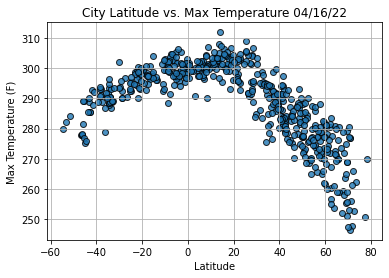

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

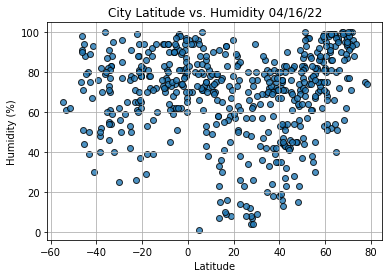

In [62]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

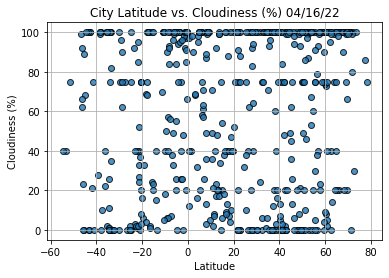

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

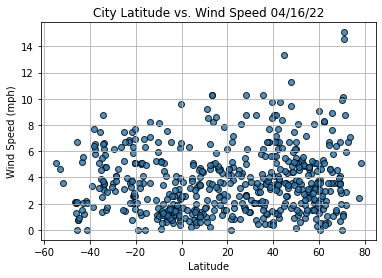

In [64]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [73]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Killorglin,52.1000,-9.7833,284.37,97,100,2.06,IE,2022-04-16 18:35:51
2,Cherskiy,68.7500,161.3000,263.85,95,100,3.47,RU,2022-04-16 18:33:13
4,Barrow,71.2906,-156.7887,256.16,71,0,8.75,US,2022-04-16 18:35:53
5,Ucluelet,48.9329,-125.5528,281.53,71,100,0.89,CA,2022-04-16 18:35:53
9,Albany,42.6001,-73.9662,283.38,71,100,0.89,US,2022-04-16 18:27:14


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

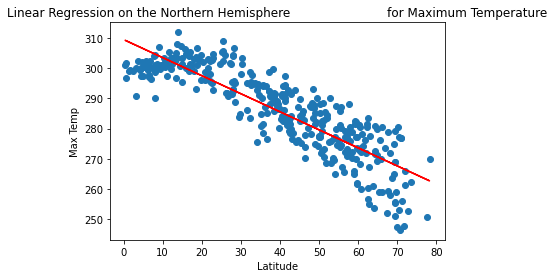

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

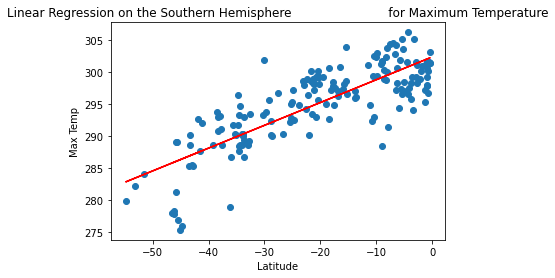

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

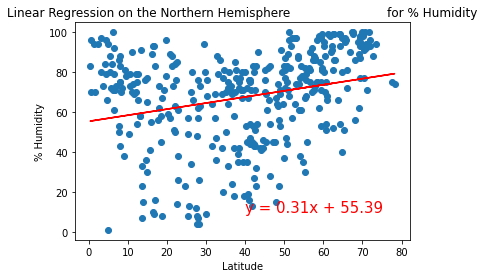

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

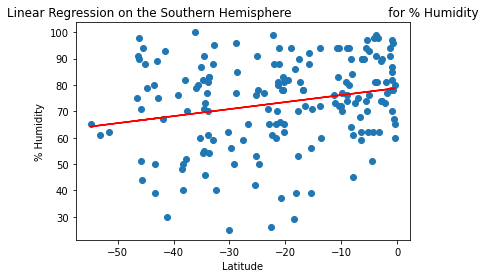

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

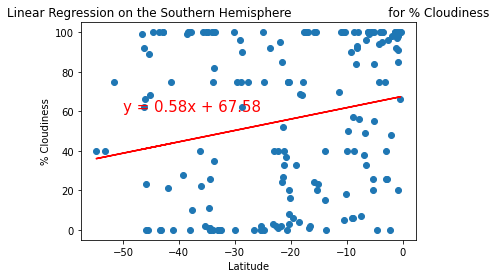

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

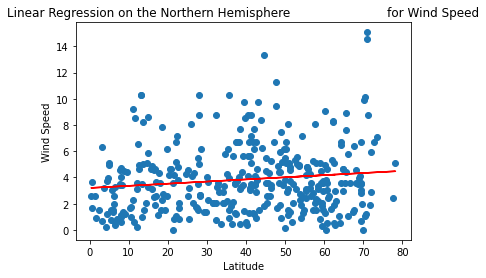

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

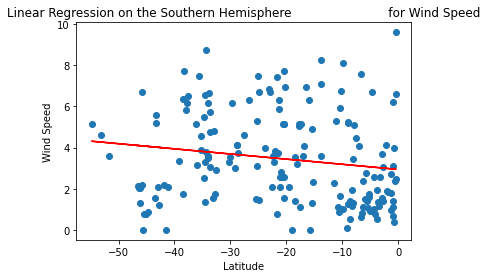

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))